___

#### DS7333 Quantifying the World: Case Study 1
#### DJ Dawkins, Nathan Deinlein, Joseph Lazarus,Puri Rudick
___


Things to do 

**Assumption Check**<br />
**L1  + L2**<br />
**Feature importance**<br />
**Random Forest feature importance**<br />

___
The goal for this case study is to build a linear regression model using L1 or L2 regularization (or both) the task to predict the Critical Temperature at which the feature, 'Material' Super Conducts. In addition, we will evaluate which variable carries the most importance.
___
<a id="main"></a>
The approach for this Notebook will cover the following topics: <br />
1) **Imports and Data Prep**
<br />
2) <a  href="#EDA">EDA  </a>: check missing values, impute as needed, visualizations and summary statistics, outliers, multicollinearity
<br />
3) <a href="#Prep">Prepare Data  </a> : Set aside 10% of data as validation set. Employ 10-fold CV for training the Liniear Regression model.
<br />
4) <a href="#resids">Residual check  </a> : on regression models
<br />
5) <a href="#LR">Linear Regression </a> ,Using L1, L2 models: compare error metrics and feature importance
<br />
6) **Run tuned models** on validation set and compare metrics to evaluate overfitting  
<br />

<a id="prep"></a>
___
# Data Preparation
___
Cleaning raw data and new feature creation

- Imports
- load data
 - Data Quality using Pandas_Profiling  
> - Check missing values
> - check for duplicates

In [50]:
# Imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [3]:
#load data from Github
train = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%201/Data/train.csv")
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

In [4]:
# Load data set called  unique_m from github 
unique_m=pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%201/Data/unique_m.csv")

unique_m.head()

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [5]:
#Join the two datasets

#delete duplicated column
del train['critical_temp']

#create list of column names
train_cols = train.columns.values.tolist()
unique_cols = unique_m.columns.values.tolist() 
col_list = train_cols + unique_cols

df = pd.concat([train, unique_m], axis = 1, ignore_index=True)
df.columns = col_list

In [6]:
#check shape
df.shape

(21263, 169)

In [7]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

___

#### IDK why but profiler isn't working for me. I'll have to do things the old fashion way
___

In [8]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

In [9]:
# profile

___
#### Old fashioned EDA <a id="EDA"></a>
___

In [10]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,4.11522

In [54]:
# What is the mean Critical Temp 

df["critical_temp"].mean()

33.31117035345764

## Columns with all zeros:
While there were no missing values observed, the summary stats show that some columns have all zeros and are essentially blank and could be removed

In [11]:
# some of these columns (9) of them are just zeros. Removing these columns

# IDK why this line doesn't work for me either

#  df.loc[:, (df != 0).any(axis=0)]

In [12]:
max = df.max().to_frame()
max.rename(columns={ max.columns[0]: "Max" }, inplace = True)

min = df.min().to_frame()
min.rename(columns={ min.columns[0]: "Min" }, inplace = True)

minmax = pd.concat([min,max], axis=1)
#minmax.head(100)

minmax0 = minmax[(minmax['Min'] == 0) & (minmax['Max'] == 0)]
#minmax0.head(100)

all_zeros = minmax0.index.tolist()
print(all_zeros)


['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']


## Remove empty columns

In [13]:
print("Before dropping: ",df.shape)
df = df.drop(all_zeros, axis=1)
print("After dropping: ",df.shape)


Before dropping:  (21263, 169)
After dropping:  (21263, 160)


## Check for Duplicate Data

In [14]:
# Check for duplicate rows
print('Duplicate rows: ',df.duplicated(keep='first').sum())


Duplicate rows:  0


There are not exact duplicate rows, but below shows that there are duplicate entries for materials


In [15]:
materials_count = pd.DataFrame(df.groupby('material').size())
materials_count.rename(columns={ materials_count.columns[0]: "Count" }, inplace = True)


materials_count.sort_values('Count', ascending = False).head(20)

,Count
material,
Y1Ba2Cu3O7,110
Bi2Sr2Ca1Cu2O8,80
La1.85Sr0.15Cu1O4,51
B2Mg1,46
Tl2Ba2Cu1O6,45
Bi2Sr2Ca1Cu2O,44
Y1Ba2Cu3O,44
Y1Ba2Cu4O8,40
Nd1.85Ce0.15Cu1O4,32


In [16]:
df = pd.DataFrame(df.groupby('material').mean())

print(df.shape)
df.head()

(15542, 159)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ag0.002Al0.998,2.0,67.424869,27.143312,53.948587,27.056422,0.500522,0.046344,80.886661,26.711839,40.443331,3.613742,653.850000,577.5066,649.341667,577.471972,0.686260,0.017654,153.3,574.5846,76.650000,6.848925,141.500000,118.094,139.534942,118.079148,0.679292,0.019222,47.0,117.434,23.500000,2.099801,6595.000000,2715.58,5321.935738,2707.338677,0.506850,0.045268,7790.0,2673.62,3895.000000,348.030837,85.550000,44.1662,74.782351,44.093448,0.570065,0.035424,83.1,43.6578,41.550000,3.712627,11.000000,10.70120,10.995908,10.701168,0.692775,0.015119,0.60,10.65600,0.300000,0.026806,332.500000,235.390,317.883627,235.284146,0.649516,0.024151,195.0,233.670,97.50000,8.711940,2.000000,2.996,1.732051,2.993416,0.562335,0.005548,2.0,2.992,1.000000,0.089353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.002,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.128
Ag0.005Zn0.995,2.0,86.624100,65.592441,83.978705,65.543882,0.662766,0.047664,42.488200,64.513759,21.244100,2.996849,818.150000,904.9235,813.441393,904.826384,0.687398,0.026278,175.3,897.6185,87.650000,12.364554,153.500000,142.115,153.068612,142.106624,0.690338,0.035679,23.0,140.465,11.500000,1.622275,8815.000000,7156.75,8654.397726,7153.747352,0.674984,0.043330,3350.0,7051.85,1675.000000,236.287828,64.300000,2.1280,13.807607,1.533669,0.063515,0.609705,125.6,0.8570,62.800000,8.859030,9.325000,7.36975,9.113452,7.365823,0.670548,0.044980,3.95,7.25675,1.975000,0.278608,275.000000,121.550,227.156334,120.768225,0.524597,0.088900,310.0,117.250,155.00000,21.865441,1.500000,1.995,1.414214,1.993081,0.636514,0.017513,1.0,1.985,0.500000,0.070534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.005,0.00,0.0,0.000,0.0

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:>

___

### Runing Random Forest as part of EDA to get a sense of Variable importance
___

### To protect against data leakage go ahead and set aside validation set 
<a id="Prep"></a>
1) Set a side 10% of the data for validation. Randomization and stratification applied to ensure this set is representative of the data as whole. The validation set serves as an unseen source of data that will give us a good indication of how we might expect to perform in production. 

2) We scaled our independent variables. Scaling the allows each feature to contribute approximately proportionately to the final distance. Scaling allows us to understand rankings of feature importance.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [19]:
#Split Modeling and Validation Datasets
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.1, shuffle=True, random_state=42)

print("Size of modeling set (to be CV split): ",train.shape)
print("Size of hold back validation set: ",val.shape)

Size of modeling set (to be CV split):  (13987, 159)
Size of hold back validation set:  (1555, 159)


In [20]:
# Scale testing data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = train.columns
d = scaler.fit_transform(train)
scaled_train = pd.DataFrame(d, columns=names)
scaled_train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
0,0.375,0.459078,0.309433,0.365612,0.262072,0.593971,0.516827,0.842107,0.185762,0.659673,0.475176,0.437820,0.492348,0.428235,0.487827,0.636900,0.407741,0.240859,0.423728,0.249772,0.322816,0.384000,0.338671,0.362435,0.302135,0.630857,0.476178,0.402344,0.314665,0.320054,0.510018,0.360075,0.261724,0.297722,0.189325,0.642551,0.495710,0.415254,0.182139,0.341603,0.406267,0.327634,0.424698,0.271894,0.365884,0.691319,0.364955,0.472493,0.489558,0.378165,0.396127,0.130543,0.147236,0.073263,0.057498,0.462390,0.191527,0.327072,0.139793,0.259925,0.321720,0.431688,0.150989,0.078983,0.010512,0.471527,0.161209,0.929812,0.144315,0.728508,0.321932,0.583333,0.809980,0.519922,0.804657,0.611954,0.431168,0.666667,0.456479,0.552771,0.176314,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.533333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000367,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.060005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.051579,0.0,0.103493
1,0.250,0.174087,0.065892,0.115450,0.065246,0.384417,0.563685,0.386652,0.005476,0.351153,0.199584,0.380653,0.409818,0.378225,0.417403,0.507707,0.376533,0.107704,0.391009,0.115002,0.085738,0.392000,0.249600,0.357935,0.230372,0.486377,0.511718,0.464844,0.184318,0.420664,0.370249,0.157967,0.112274,0.134107,0.105889,0.478704,0.528107,0.211302,0.053754,0.195873,0.106399,0.069624,0.063278,0.032868,0.036217,0.429534,0.281977,0.117765,0.084135,0.104531,0.076199,0.251433,0.351518,0.197392,0.280410,0.435364,0.224615,0.394167,0.311014,0.335316,0.358518,0.210463,0.159471,0.145632,0.114852,0.437515,0.439361,0.318624,0.107090,0.296115,0.276529,0.333333,0.300000,0.314083,0.290781,0.495273,0.400121,0.333333,0.247895,0.272166,0.180534,0.0,0.0,0.0,0.019048,0.000000,0.0,0.000000,0.0,0.0,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002068,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [21]:
#Scale validations
scaler = preprocessing.MinMaxScaler()
names = train.columns
d = scaler.fit_transform(val)
scaled_val = pd.DataFrame(d, columns=names)
scaled_val.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
0,0.714286,0.396339,0.207020,0.309760,0.149430,0.816605,0.834933,0.932412,0.067040,0.629271,0.527122,0.284793,0.683807,0.234233,0.592359,0.849542,0.541255,0.656476,0.677666,0.600524,0.822034,0.545549,0.262692,0.460148,0.153617,0.851593,0.867638,0.684,0.124612,0.534661,0.789303,0.212646,0.102725,0.057571,0.002612,0.793860,0.731624,0.524538,0.065668,0.404930,0.422834,0.261346,0.467599,0.127693,0.283396,0.741647,0.418142,0.397221,0.370941,0.364641,0.369282,0.078575,0.033774,0.049010,0.007518,0.814971,0.814774,0.122907,0.019102,0.082312,0.104876,0.346502,0.209480,0.057041,0.002814,0.656649,0.605460,0.930228,0.153259,0.712423,0.746297,0.200000,0.169312,0.194938,0.172475,0.856366,0.771499,0.4,0.143123,0.305505,0.159047,0.0,0.0,0.0,0.0,0.0,0.0,0.205882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.291667,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.124378,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.000,0.340907
1,0.428571,0.386905,0.241335,0.302614,0.161234,0.620871,0.509955,0.618237,0.180943,0.525654,0.539816,0.380005,0.700133,0.307439,0.597193,0.643232,0.414870,0.667941,0.720346,0.700995,0.851785,0.535714,0.319537,0.402452,0.165211,0.626218,0.562446,0.796,0.301561,0.705349,0.996360,0.226584,0.115853,0.039266,0.002380,0.613928,0.480347,0.396598,0.084646,0.320519,0.386057,0.419321,0.536393,0.391270,0.507594,0.727221,0.501806,0.260745,0.390650,0.270705,0.250336,0.076223,0.030211,0.035778,0.006026,0.557082,0.541038,0.122907,0.017722,0.094550,0.100778,0.318422,0.149095,0.019068,0.001215,0.157413,0.172685,0.930228,0.142307,0.842724,0.718306,0.300000,0.246884,0.279129,0.230980,0.651056,0.573575,0.4,0.153182,0.400000,0.383326,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.063184,0.46825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.170058
2,0.142857,0.432023,0.

In [22]:
#Create X and Y for modeling
X_scaled = scaled_train.drop(['critical_temp'],axis=1) #droping target
y_scaled = scaled_train['critical_temp']

In [23]:
Xval_scaled = scaled_val.drop(['critical_temp'],axis=1) #droping target
yval_scaled = scaled_val['critical_temp']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=12)

In [25]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
rf.feature_importances_

array([2.64708714e-05, 1.28729572e-03, 7.07925125e-03, 1.40181823e-03,
       2.35262775e-03, 1.14912829e-03, 4.04688544e-03, 9.95091880e-04,
       3.80795408e-03, 3.60968916e-03, 4.29036760e-03, 1.21723238e-03,
       2.28651453e-03, 1.25250933e-03, 1.65762917e-03, 1.56193322e-03,
       2.61991731e-03, 1.94323690e-03, 2.42452332e-03, 2.51951023e-03,
       3.62844715e-03, 1.50329751e-03, 2.56926436e-03, 9.96492688e-04,
       2.49848624e-03, 1.08933257e-03, 3.72508434e-03, 5.82376966e-03,
       2.66107866e-03, 1.49464159e-03, 4.12864450e-03, 1.85097509e-03,
       2.25889138e-03, 2.61137773e-03, 7.55843027e-03, 1.37153179e-03,
       4.10116379e-03, 4.66514218e-04, 1.44361370e-03, 4.59390122e-03,
       3.96083436e-03, 1.01103657e-03, 2.14333798e-03, 1.69859696e-03,
       6.18636679e-03, 1.09439264e-03, 3.65393443e-03, 8.26367005e-04,
       2.81043162e-03, 2.74622267e-03, 8.62852287e-03, 9.68097041e-04,
       2.61679842e-03, 1.09081311e-03, 2.39147504e-03, 1.03366887e-03,
      

In [27]:
# load the model's coefficeint weights and feature names into a dataframe 

randomForrestReg_weights = rf.feature_importances_.ravel()
randomForrestReg_feature_names = X_train.columns.values
randomForrestReg_ft_imp_df = pd.DataFrame({'feature_names':randomForrestReg_feature_names, 'weights':randomForrestReg_weights, 'absolute_weights': np.abs(randomForrestReg_weights)})
randomForrestReg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False)


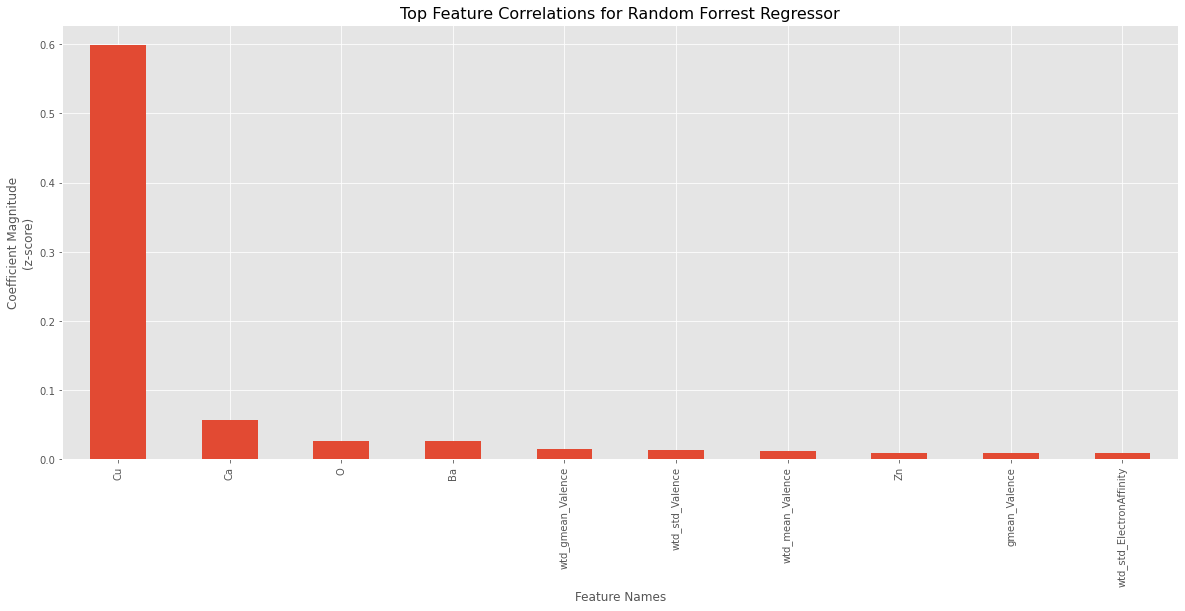

In [28]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

#play with the df.head(#) to get more or less columns
randomForrestReg_wt_plt_df = randomForrestReg_ft_imp_df.head(10)

randomForrestReg_weights = pd.Series(randomForrestReg_wt_plt_df['weights'].values,index=randomForrestReg_wt_plt_df['feature_names'])
ax = randomForrestReg_weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Random Forrest Regressor", fontsize=16)
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [30]:
df_reduced = df[['Cu', 'Ca', 'O', 'Ba', 'wtd_gmean_Valence']] 
X = add_constant(df_reduced)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                17.946101
Cu                    1.686224
Ca                    1.153415
O                     2.016009
Ba                    1.402993
wtd_gmean_Valence     1.682357
dtype: float64

**Good result from VIF**

<AxesSubplot:xlabel='Cu', ylabel='critical_temp'>

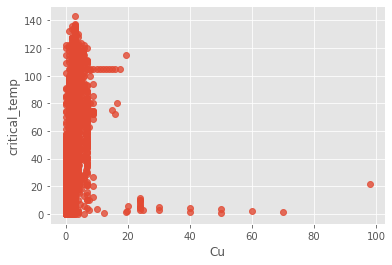

In [31]:
# visualise Copper Critical temp relationship
sns.regplot(x="Cu", y="critical_temp", data=df, fit_reg=False)

<AxesSubplot:xlabel='Ca', ylabel='critical_temp'>

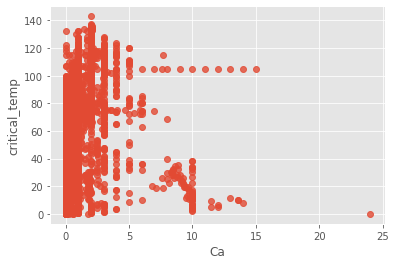

In [32]:
# visualise Calcium relationship
sns.regplot(x="Ca", y="critical_temp", data=df, fit_reg=False)

<AxesSubplot:xlabel='Pb', ylabel='critical_temp'>

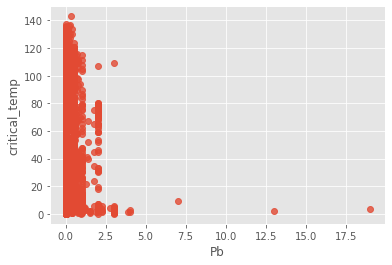

In [46]:
# visualise area-price relationship
sns.regplot(x="Pb", y="critical_temp", data=df, fit_reg=False)

<AxesSubplot:xlabel='Hg', ylabel='critical_temp'>

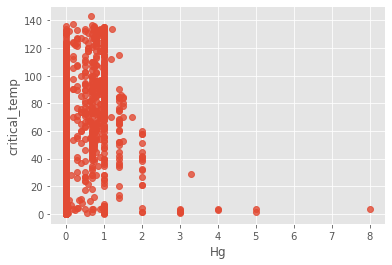

In [38]:
# visualise area-price relationship
sns.regplot(x="Hg", y="critical_temp", data=df, fit_reg=False)

In [39]:
X_scaled.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
0,0.375,0.459078,0.309433,0.365612,0.262072,0.593971,0.516827,0.842107,0.185762,0.659673,0.475176,0.437820,0.492348,0.428235,0.487827,0.636900,0.407741,0.240859,0.423728,0.249772,0.322816,0.384000,0.338671,0.362435,0.302135,0.630857,0.476178,0.402344,0.314665,0.320054,0.510018,0.360075,0.261724,0.297722,0.189325,0.642551,0.495710,0.415254,0.182139,0.341603,0.406267,0.327634,0.424698,0.271894,0.365884,0.691319,0.364955,0.472493,0.489558,0.378165,0.396127,0.130543,0.147236,0.073263,0.057498,0.462390,0.191527,0.327072,0.139793,0.259925,0.321720,0.431688,0.150989,0.078983,0.010512,0.471527,0.161209,0.929812,0.144315,0.728508,0.321932,0.583333,0.809980,0.519922,0.804657,0.611954,0.431168,0.666667,0.456479,0.552771,0.176314,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.533333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000367,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.060005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.051579,0.0
1,0.250,0.174087,0.065892,0.115450,0.065246,0.384417,0.563685,0.386652,0.005476,0.351153,0.199584,0.380653,0.409818,0.378225,0.417403,0.507707,0.376533,0.107704,0.391009,0.115002,0.085738,0.392000,0.249600,0.357935,0.230372,0.486377,0.511718,0.464844,0.184318,0.420664,0.370249,0.157967,0.112274,0.134107,0.105889,0.478704,0.528107,0.211302,0.053754,0.195873,0.106399,0.069624,0.063278,0.032868,0.036217,0.429534,0.281977,0.117765,0.084135,0.104531,0.076199,0.251433,0.351518,0.197392,0.280410,0.435364,0.224615,0.394167,0.311014,0.335316,0.358518,0.210463,0.159471,0.145632,0.114852,0.437515,0.439361,0.318624,0.107090,0.296115,0.276529,0.333333,0.300000,0.314083,0.290781,0.495273,0.400121,0.333333,0.247895,0.272166,0.180534,0.0,0.0,0.0,0.019048,0.000000,0.0,0.000000,0.0,0.0,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002068,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.

### OLS Regression

In [58]:
# k-fold CV (using all the variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores    

array([-0.01328068, -0.01404233, -0.01354502, -0.18529712, -0.01365886,
       -0.01327877, -0.01393276, -0.01474467, -0.40183194, -0.01463321])

In [57]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [59]:
# number of features in X_train
len(X_train.columns)

158

In [60]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 159))}]


# step-3: perform grid search
# 3.1 specify model  rfe = recursive feature elimination
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV() rfe = recursive feature elimination
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 158 candidates, totalling 790 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [61]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.642425,0.044933,0.002201,7.483538e-04,1,{'n_features_to_select': 1},-0.086913,-0.037851,-0.042369,-0.057765,-0.051405,-0.055261,0.017276,2,-0.055509,-0.041453,-0.040325,-0.055467,-0.049855,-0.048522,0.006572
1,1.611350,0.057141,0.002401,4.899598e-04,2,{'n_features_to_select': 2},-0.132968,-0.027831,-0.039808,-0.041438,-0.033237,-0.055056,0.039257,1,-0.049970,-0.030380,-0.036893,-0.041525,-0.032451,-0.038244,0.007007
2,1.571179,0.040202,0.002401,4.900182e-04,3,{'n_features_to_select': 3},-0.670024,-0.025216,-0.029966,-0.032119,-0.032961,-0.158057,0.255997,152,-0.031316,-0.026787,-0.028421,-0.030276,-0.032136,-0.029787,0.001947
3,1.604493,0.030902,0.002801,4.004002e-04,4,{'n_features_to_select': 4},-0.650531,-0.024281,-0.026331,-0.044750,-0.032452,-0.155669,0.247534,151,-0.031071,-0.025825,-0.025317,-0.026783,-0.031652,-0.028130,0.002687
4,1.638896,0.034964,0.002000,2.780415e-07,5,{'n_features_to_select': 5},-0.696149,-0.023252,-0.025678,-0.046193,-0.032447,-0.164744,0.265822,154,-0.030540,-0.024857,-0.024256,-0.025804,-0.031650,-0.027421,0.003060
5,1.642793,0.034186,0.002001,6.325605e-04,6,{'n_features_to_select': 6},-0.696005,-0.022553,-0.024336,-0.069969,-0.030388,-0.168650,0.264246,155,-0.030540,-0.023537,-0.023092,-0.024777,-0.029417,-0.026273,0.003096
6,1.614373,0.008716,0.002200,4.001857e-04,7,{'n_features_to_select': 7},-0.671878,-0.021082,-0.022104,-0.105360,-0.029711,-0.170027,0.252900,156,-0.028398,-0.021534,-0.021280,-0.023543,-0.028617,-0.024674,0.003227
7,1.602434,0.047167,0.002600,4.895135e-04,8,{'n_features_to_select': 8},-0.673461,-0.020745,-0.021503,-0.141852,-0.027354,-0.176983,0.252467,158,-0.028394,-0.021132,-0.020944,-0.021495,-0.025671,-0.023527,0.002994
8,1.587409,0.048630,0.002801,4.001142e-04,9,{'n_features_to_select': 9},-0.668308,-0.019885,-0.020045,-0.141824,-0.025360,-0.175084,0.250965,157,-0.028356,-0.019888,-0.019848,-0.021107,-0.023937,-0.022627,0.003227
9,1.609301,0.040851,0.002401,4.898625e-04,10,{'n_features_to_select': 10},-0.565035,-0.019768,-0.020030,-0.188917,-0.024864,-0.163723,0.210873,153,-0.025248,-0.019821,-0.019756,-0.019904,-0.023195,-0.021585,0.002249


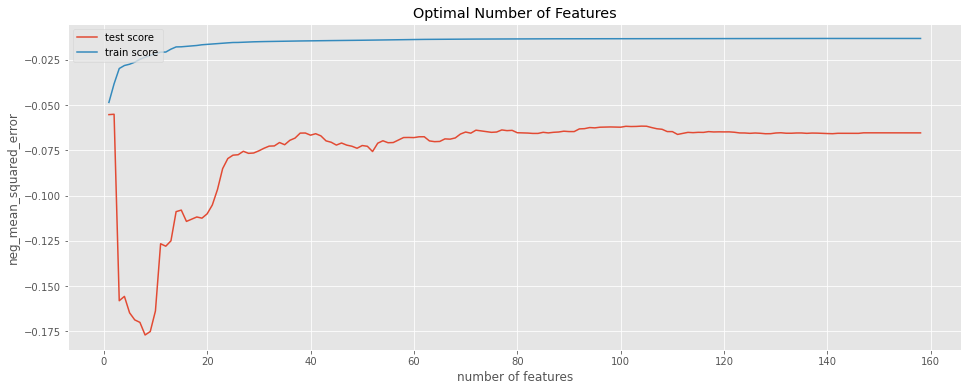

In [63]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('neg_mean_squared_error')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### Place holder for Regression residuals check

<a id="resids"></a>

### Place Holder for L1 and L2 Regression

<a id="LR"></a>